In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
X = df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'])
y = df['Survived']

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
from sklearn.preprocessing import LabelEncoder

cat_features = ['Sex', 'Embarked']

for col in cat_features:
    lbl = LabelEncoder()
    X[col] = lbl.fit_transform(list(df[col].values))
    
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [9]:
from sklearn.preprocessing import StandardScaler

num_features = ['Age', 'Fare']

for col in num_features:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(np.array(df[col].values).reshape(-1, 1))
    
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.592481,1,0,-0.502445,2
1,1,0,0.638789,1,0,0.786845,0
2,3,0,-0.284663,0,0,-0.488854,2
3,1,0,0.407926,1,0,0.420730,2
4,3,1,0.407926,0,0,-0.486337,2


In [23]:
from sklearn.decomposition import PCA

pca = PCA()

X_pca = pca.fit_transform(X)
X_pca

array([[ 0.45240718, -1.08298647,  0.12184369, ..., -0.55341304,
         0.2574928 ,  0.15903496],
       [-0.08520984,  1.87617495, -0.30677503, ..., -0.31736987,
        -0.66307032, -0.44422571],
       [-0.36969259, -0.95386643, -0.1575431 , ...,  0.01692   ,
         0.18455959, -0.80472577],
       ...,
       [ 1.13142423, -0.3480859 ,  0.54543858, ...,  1.39577684,
         0.09312179, -0.42051188],
       [-0.67546747,  0.80709975, -1.12539145, ..., -0.23315296,
        -1.02397979,  0.62311463],
       [-0.69590791, -0.65273176, -0.16961654, ...,  0.13211487,
         0.38827362,  0.20329391]])

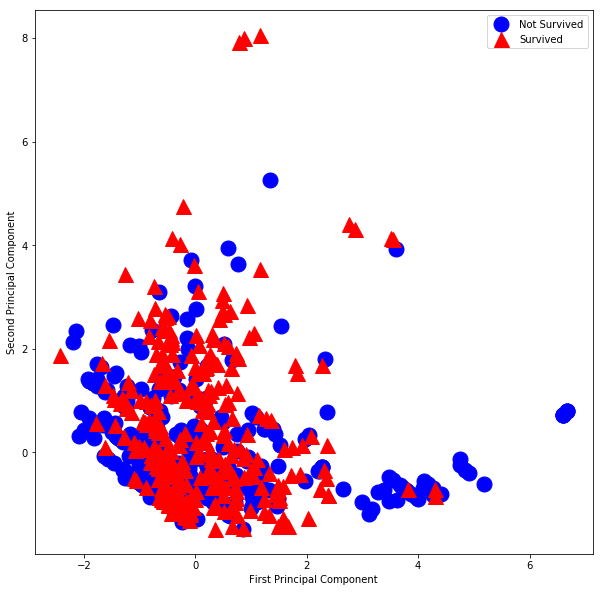

In [34]:
def plot_2d(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo", ms=15)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^", ms=15) 
    plt.xlabel("First Principal Component")
    plt.ylabel("Second Principal Component")
    plt.legend(['Not Survived', 'Survived'], loc="best")

plt.figure(figsize=(10, 10))
plot_2d(X_pca, y)
plt.show()

<IPython.core.display.Javascript object>


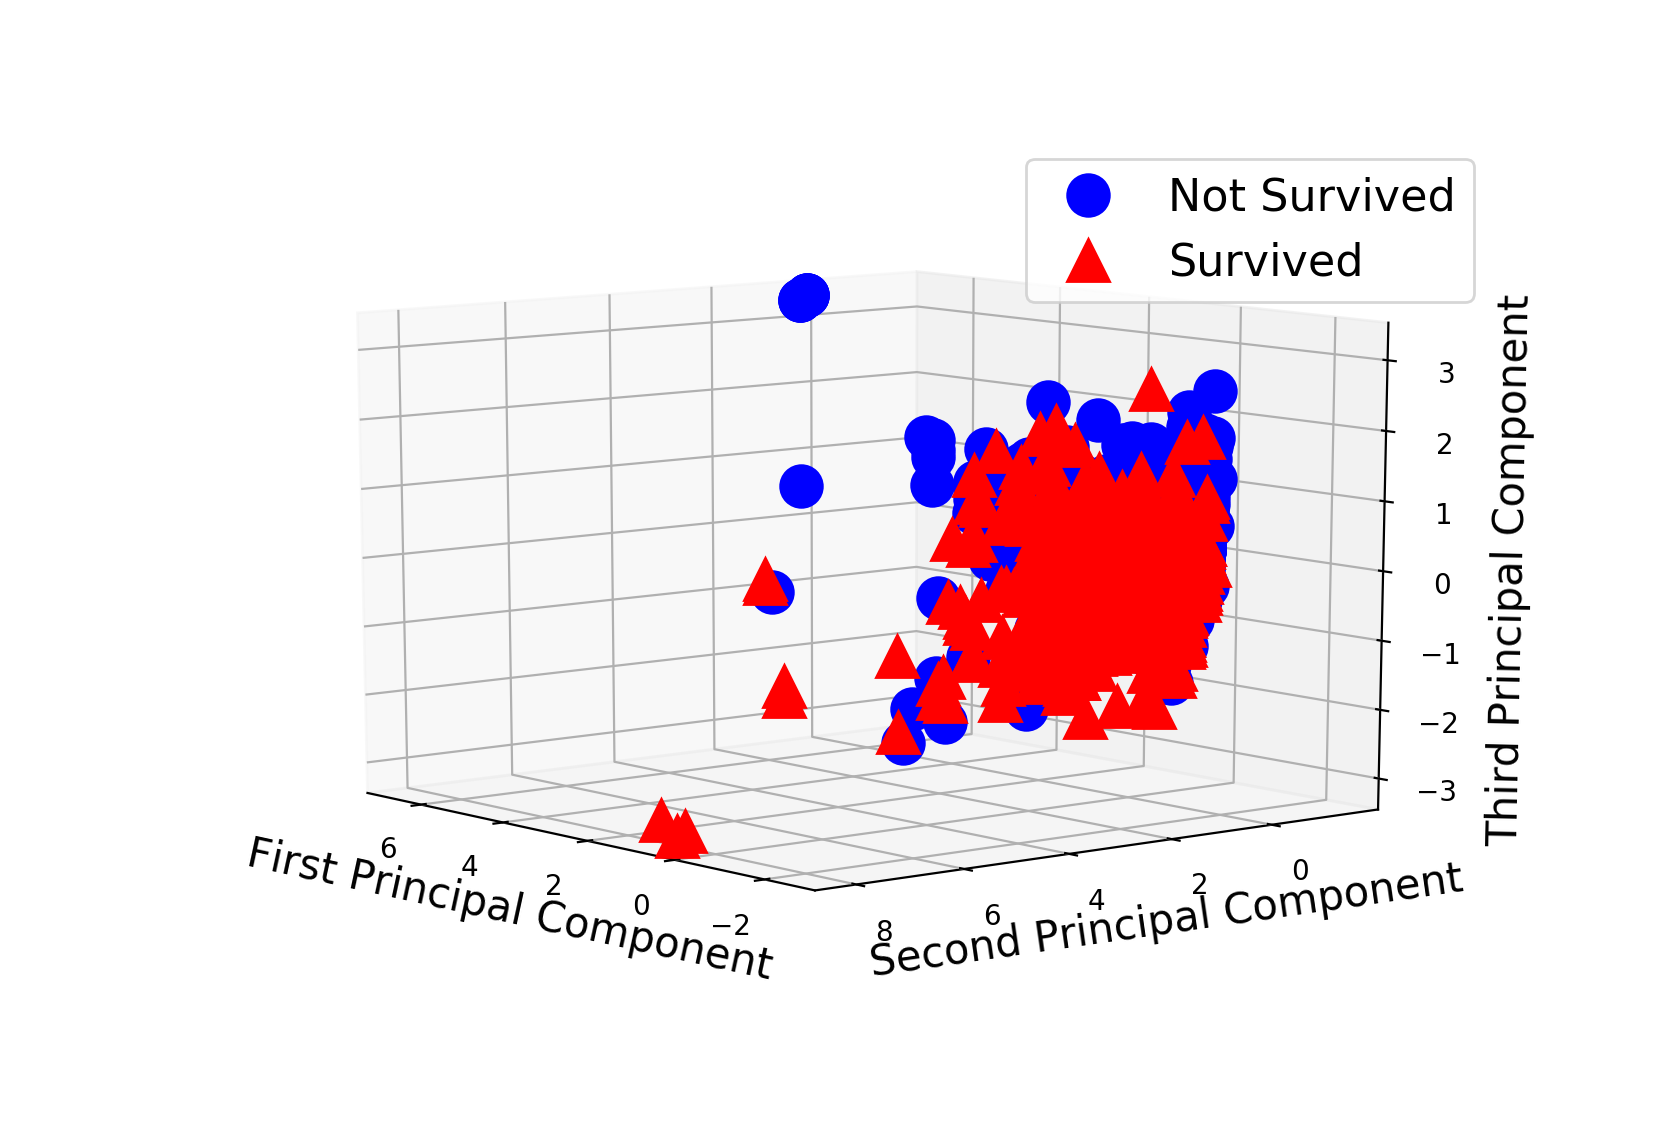

In [43]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

def plot_3d(X, y):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot(X[:, 0][y==0], X[:, 1][y==0], X[:, 2][y==0], "bo", ms=15)
    ax.plot(X[:, 0][y==1], X[:, 1][y==1], X[:, 2][y==1], "r^", ms=15)
    
    ax.set_xlabel("First Principal Component", fontsize=15)
    ax.set_ylabel("Second Principal Component", fontsize=15)
    ax.set_zlabel("Third Principal Component", fontsize=15)
    ax.legend(['Not Survived', 'Survived'], loc="best", fontsize=16)
    
plot_3d(X_pca, y)
plt.show()

In [25]:
pca.explained_variance_ratio_

array([0.29861423, 0.27878364, 0.14435789, 0.10032297, 0.08511287,
       0.0565313 , 0.0362771 ])

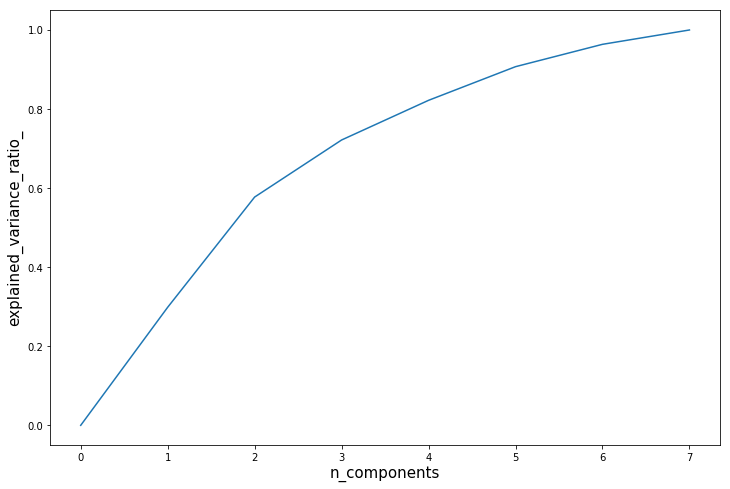

In [47]:
%matplotlib inline
plt.figure(figsize=(12, 8))
plt.plot(np.hstack([0, pca.explained_variance_ratio_.cumsum()]))
plt.xlabel("n_components", fontsize=15)
plt.ylabel("explained_variance_ratio_", fontsize=15)
plt.show()

In [35]:
pca.components_

array([[ 0.11183674, -0.07941325, -0.44243158,  0.76780369,  0.40112225,
         0.18238728,  0.04187721],
       [-0.54871564, -0.07710008,  0.36282116,  0.06927113,  0.10611681,
         0.70697471, -0.21320182],
       [ 0.03346417,  0.07149479,  0.73973136,  0.43191677,  0.07253554,
        -0.27057867,  0.42607492],
       [ 0.19277072,  0.01344342,  0.23438192,  0.31042877, -0.19503473,
        -0.22658432, -0.84969337],
       [ 0.20976867, -0.16834458,  0.19546601, -0.34328849,  0.85013236,
        -0.10800491, -0.19290713],
       [ 0.75997778,  0.20089286,  0.16678221, -0.06882831, -0.1246611 ,
         0.57338804,  0.07216615],
       [-0.16295448,  0.95590744, -0.06674175, -0.01328797,  0.21511576,
        -0.04392559, -0.08277387]])

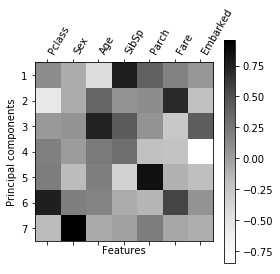

In [58]:
plt.matshow(pca.components_, cmap='Greys')
plt.yticks(range(len(pca.components_)), range(1, 8))
plt.colorbar()
plt.xticks(range(X.shape[1]), X.columns.values, rotation=60, ha='left')
plt.xlabel("Features")
plt.ylabel("Principal components")
plt.show()